In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
import pickle
from keras.models import Sequential
import sys
sys.path.append('P:/')
from Class_64 import DataGenerator 
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

In [3]:
# This reads in the list that has the labels. ie if there is at least one AF beat in the 5 beats then the whole
# sample is labelled as AF
with open('CNN_labels.pkl', 'rb') as f:
    Labels = pickle.load(f)
    
# Need to split the data into training, validation and test sets
# This function splits it into training/validation and test sets. So need to use it again to split
# into training and validation sets.

# The generator works by receiving an index between 1-157054
indexes = np.arange(1,157055)

X, X_test, y, y_test = train_test_split(indexes, Labels, test_size=0.25, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle = False)

In [4]:
# Parameters
params = {'dim': (64,64),
          'batch_size': 25,
          'n_classes': 2,
          'n_channels': 5,
          'shuffle': True}

training_generator = DataGenerator(X_train, y_train , **params)
validation_generator = DataGenerator(X_val, y_val, **params)
test_generator = DataGenerator(X_test, y_test, **params)

In [5]:
# Implement a sequential network
def createModel():
    model = Sequential()
    # model.add(Embedding(10000, 256, input_length=400, name='embed'))
    model.add(Conv2D(32, (8, 8),  activation='relu', input_shape=(64, 64, 5))),
    model.add(Conv2D(32, (8, 8), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5)) # Weight decay rate? 1E-6
    model.add(Conv2D(32, (6, 6), activation = 'relu'))
    model.add(Conv2D(32, (4, 4), activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5)),
    model.add(Dense(1, activation='sigmoid')) #softmax?
    return model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 32)        16032     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        102432    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        65568     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)        

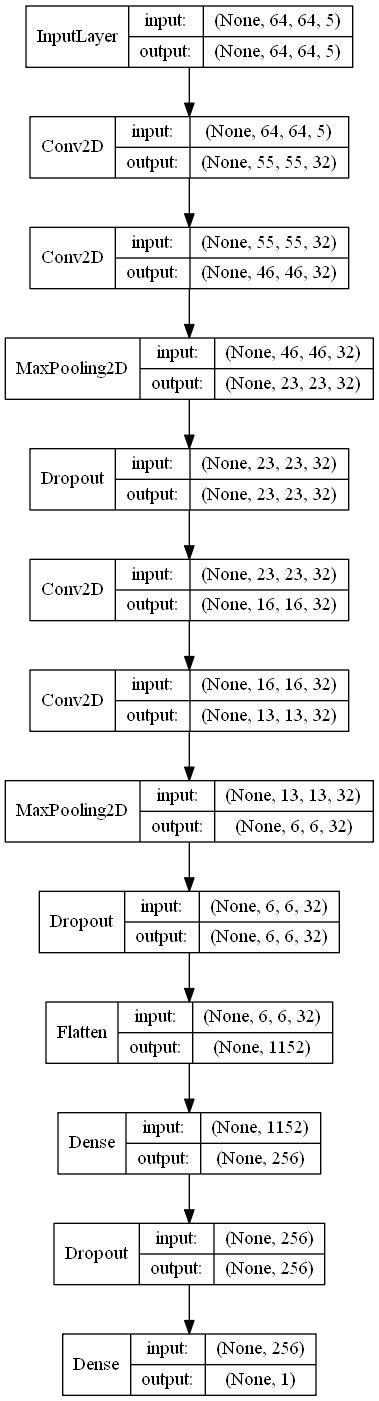

In [6]:
# Create CNN
model = createModel()
print(model.summary())
# from keras.utils import plot_model
# plot_model(model, to_file='CNN_structure.png', show_shapes=True, show_layer_names=False, rankdir='TB')

In [6]:
sgd = optimizers.SGD(lr=0.001, decay=0.000001, momentum=0.8, nesterov=True)
model.compile(optimizer=sgd, loss ='binary_crossentropy', metrics=['mse', 'mae', 'binary_accuracy'])
history = model.fit_generator(generator = training_generator, validation_data = validation_generator, epochs=20, verbose = True)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 32)        16032     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        102432    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        65568     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        16416     
______________________

KeyboardInterrupt: 

In [ ]:
model.save('CNN_CLUSTER_64_8x8.h5')

with open('History_CNN_64_8x8.pkl', 'wb') as f:
    pickle.dump(history.history,f)